## Customer Churn Analysis

### Key Facts
- **Objective**: Understand customer churn at PowerCo.
- **Dataset**: Includes customer information, sales channels, consumption patterns, and pricing data.
- **Churn Rate**: Approximately 10% of customers churned.

### Analysis Overview
- **Churn Overview**: Examine overall churn rates.
- **Sales Channels**: Analyze churn by sales channels.
- **Consumption Patterns**: Investigate energy and gas consumption.
- **Time Trends**: Explore churn trends by year and month.
- **Additional Splits**: Analyze churn by contract type, tenure, and origin.

### Key Takeaways
- Insights and actionable recommendations will be summarized at the end of the notebook.

In [1]:
# Import necessary libraries for data analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Set a consistent style for plots
sns.set(color_codes=True)

### Loading Datasets

We will load the following datasets to begin our analysis:

- **Client Data**: Contains customer information, sales channels, and churn labels.
- **Price Data**: Includes pricing details for energy and power.

In [2]:
# Load the client data and price data into separate DataFrames
client = pd.read_csv('client_data (1).csv')
price = pd.read_csv('price_data (1).csv')

In [3]:
# Configure Pandas to display all columns in the output for better visibility
pd.set_option('display.max_columns', None)

In [4]:
# Preview the first three rows of the client dataset to understand its structure
client.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
# Preview the first three rows of the price dataset to understand its structure
price.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


### Descriptive Statistics

Explore the structure and summary statistics of the datasets to:

- Understand their contents.
- Identify potential issues such as missing values or outliers.

In [6]:
# Display the structure and data types of the client dataset
# This helps identify missing values and understand the dataset's schema
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
# Display the structure and data types of the price dataset
# This helps identify missing values and understand the dataset's schema
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
# Generate descriptive statistics for the client dataset
# This provides insights into the distribution and range of numerical columns
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


Table: Descriptive statistics of the client dataset, showing the distribution and range of numerical columns.

### Observations on Churn and Dates

- **Date Columns**: Currently in string format; need conversion to datetime for analysis.
- **Churn Rate**: Approximately 10%, as indicated by the mean value of the `churn` column.

In [9]:
# Convert date columns to datetime format for better analysis
# This ensures proper handling of date-related operations
client['date_activ'] = pd.to_datetime(client['date_activ'], format='%Y-%m-%d', errors='coerce')
client['date_end'] = pd.to_datetime(client['date_end'], format='%Y-%m-%d', errors='coerce')
client['date_modif_prod'] = pd.to_datetime(client['date_modif_prod'], format='%Y-%m-%d', errors='coerce')
client['date_renewal'] = pd.to_datetime(client['date_renewal'], format='%Y-%m-%d', errors='coerce')

# Display summary statistics for the transformed date columns
client[['date_activ','date_end','date_modif_prod','date_renewal']].describe()

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


Table: Summary statistics of the transformed date columns, showing the range and distribution of activation, end, modification, and renewal dates.

### Insights from Date Columns

- **Contract End Dates**: Most customers ended their contracts in 2016.
- **Next Steps**: Analyze this trend further using visualizations.

In [10]:
# Generate descriptive statistics for the price dataset
# This provides insights into the distribution and range of numerical columns
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Table: Descriptive statistics of the price dataset, showing the distribution and range of numerical columns.

In [11]:
# Generate descriptive statistics for the client dataset again
# This ensures consistency and provides additional insights if needed
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


Table: Repeated descriptive statistics of the client dataset for consistency and additional insights.

### Data Distribution and Outliers

- **Skewness**: Many columns are highly skewed, with over 50% zeros in some cases.
- **Outliers**: Temporarily remove outliers for analysis but retain them for churned customers to preserve data integrity.

### Channel Sales Analysis

Analyze the `channel_sales` column to:

- Identify channels with the highest churn rates.
- Determine the total customers handled by each channel.

In [12]:
# Calculate churn percentages for each sales channel
# Normalize by index to get percentages
channel_churn_pct = pd.crosstab(client['channel_sales'], client['churn'], normalize='index') * 100
channel_churn_pct.columns = ['Not Churned (%)', 'Churned (%)']

# Calculate total customers handled by each channel
channel_customer_total = client['channel_sales'].value_counts().rename('Total Customers Handled')

# Merge churn percentages and total customers into a summary table
summary = channel_churn_pct.merge(channel_customer_total, left_index=True, right_index=True)

# Sort channels by churn percentage in descending order
summary.sort_values(by='Churned (%)', ascending=False, inplace=True)

# Format numbers with thousand separators
summary['Total Customers Handled'] = summary['Total Customers Handled'].apply(lambda x: f"{x:,}")
summary

,Not Churned (%),Churned (%),Total Customers Handled
channel_sales,,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954,"6,754"
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364,"1,375"
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656,893
MISSING,92.402685,7.597315,"3,725"
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714,"1,843"
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000,3
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000,2
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000,11


Table: Summary of churn percentages and total customers handled by each sales channel, sorted by churn rate.

Table: Summary of churn percentages and total customers handled by each sales channel.

### So, we can see that the top 5 channels are the ones that have highest churn rate...whereas the last three have 0 churn. But, we also have to note that the last three channels handled very less number of customers...so we can ignore them. Therefore, channel_sales column is important column for churn prediction.

### Channel Sales Analysis

Analyze the `channel_sales` column to:

- Identify channels with the highest churn rates.
- Determine the total customers handled by each channel.

This analysis uses dataframes to calculate churn percentages and total customer counts.

Contract: Contract type C and D customers show the highest churn, suggesting retention policies could target them.

In [13]:
# Select relevant columns for analyzing consumption patterns
# Includes churn status and consumption metrics
cons = client[['id', 'churn', 'cons_12m', 'cons_gas_12m', 'cons_last_month']]
cons

,id,churn,cons_12m,cons_gas_12m,cons_last_month
0,24011ae4ebbe3035111d65fa7c15bc57,1,0,54946,0
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0
2,764c75f661154dac3a6c254cd082ea7d,0,544,0,0
3,bba03439a292a1e166f80264c16191cb,0,1584,0,0
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526
...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0,32270,47940,0
14602,d0a6f71671571ed83b2645d23af6de00,1,7223,0,181
14603,10e6828ddd62cbcf687cb74928c4c2d2,1,1844,0,179
14604,1cf20fd6206d7678d5bcafd28c53b4db,0,131,0,0


Table: Summary of consumption data, including churn status and energy/gas usage metrics.

Table: Summary of consumption data for analysis.

Products: Customers with fewer active products churn more often, supporting cross-sell strategies to increase retention.

C:\Users\deads\AppData\Local\Temp\ipykernel_2996\1562842779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=cons, palette='Set2')
C:\Users\deads\AppData\Local\Temp\ipykernel_2996\1562842779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=cons, palette='Set2')
C:\Users\deads\AppData\Local\Temp\ipykernel_2996\1562842779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=cons, palette='Set2')


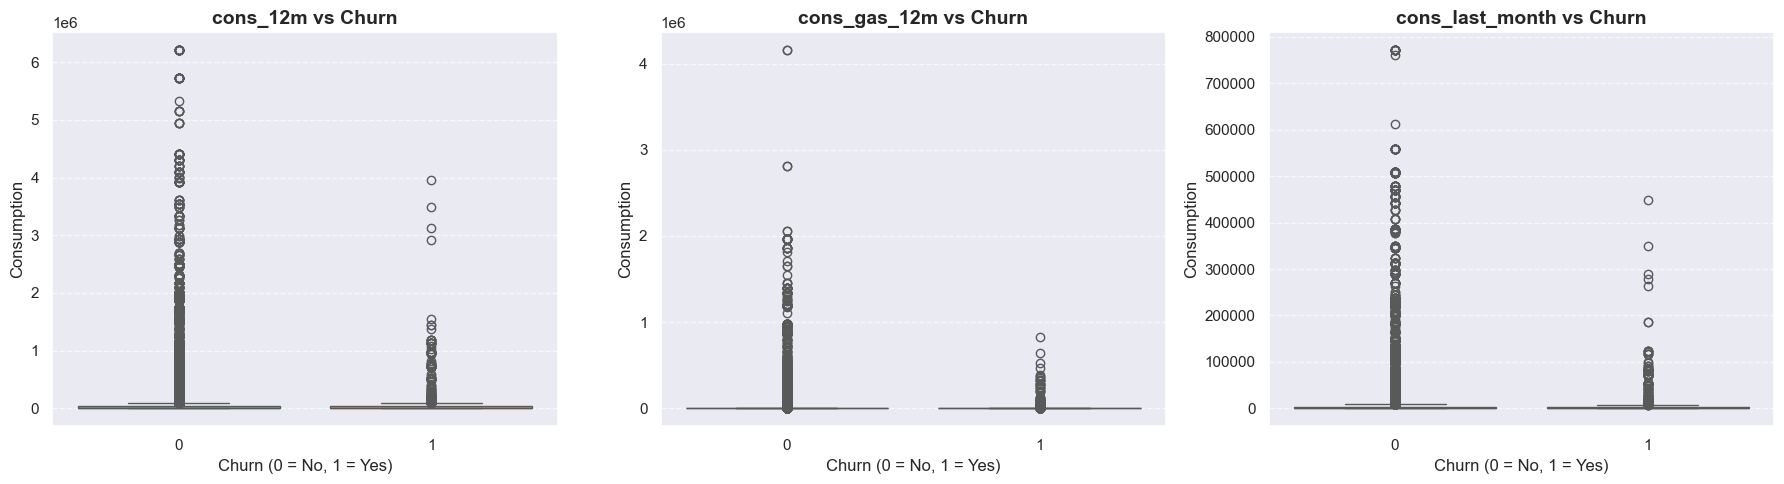

In [15]:
# Plot boxplots to visualize the relationship between consumption metrics and churn
# This helps identify any significant differences in consumption patterns
plt.figure(figsize=(18, 5))
cons_columns = cons.columns.difference(['id', 'churn'])
for i, col in enumerate(cons_columns, 1):  # Iterate over consumption columns
    plt.subplot(1, 3, i)
    sns.boxplot(x='churn', y=col, data=cons, palette='Set2')
    plt.title(f'{col} vs Churn', fontsize=14, fontweight='bold')
    plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel('Consumption', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Figure: Boxplots showing the relationship between consumption metrics (`cons_12m`, `cons_gas_12m`, `cons_last_month`) and churn.

Tenure: Early-tenure customers churn at higher rates, indicating that loyalty programs could help improve retention.

Figure: Boxplots showing the relationship between consumption columns (`cons_12m`, `cons_gas_12m`, `cons_last_month`) and churn.

Origin: Certain acquisition campaigns are linked to higher churn, indicating potential quality issues with lead sources.

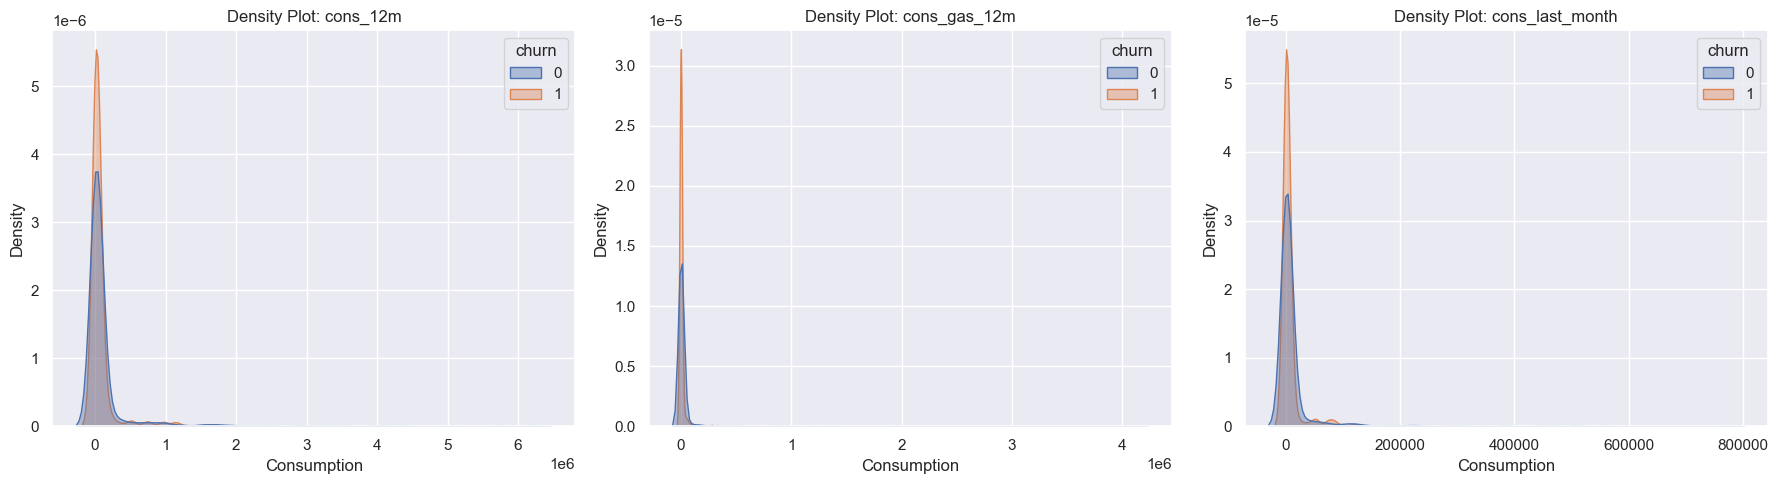

In [16]:
# Plot density plots to visualize the distribution of consumption metrics by churn status
# This provides additional insights into the overlap or separation of distributions
plt.figure(figsize=(18, 5))

for i, col in enumerate(cons_columns, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=cons, x=col, hue='churn', fill=True, common_norm=False, alpha=0.4)
    plt.title(f'Density Plot: {col}')
    plt.xlabel('Consumption')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Figure: Density plots showing the distribution of consumption metrics (`cons_12m`, `cons_gas_12m`, `cons_last_month`) by churn status.

### Consumption Analysis

Analyze the consumption columns (`cons_12m`, `cons_gas_12m`, `cons_last_month`) to:

- Identify patterns in energy and gas usage.
- Explore their relationship with churn.

In [17]:
# Generate descriptive statistics for the consumption dataset
# This provides insights into the distribution and range of consumption metrics
cons.describe()

,churn,cons_12m,cons_gas_12m,cons_last_month
count,14606.000000,1.460600e+04,1.460600e+04,14606.000000
mean,0.097152,1.592203e+05,2.809238e+04,16090.269752
std,0.296175,5.734653e+05,1.629731e+05,64364.196422
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,5.674750e+03,0.000000e+00,0.000000
50%,0.000000,1.411550e+04,0.000000e+00,792.500000
75%,0.000000,4.076375e+04,0.000000e+00,3383.000000
max,1.000000,6.207104e+06,4.154590e+06,771203.000000


Table: Descriptive statistics of the consumption dataset, showing the distribution and range of energy and gas usage metrics.

In [18]:
# Analyze the number of clients with consumption metrics above the 80th percentile
# This helps identify high-consumption customers and their potential impact on churn
for col in ['cons_12m', 'cons_gas_12m', 'cons_last_month']:
    q3 = cons[col].quantile(0.80)
    count_above_q3 = (cons[col] > q3).sum()
    print(f"{col} → Q3: {q3:.2f}, Clients above Q3: {count_above_q3}, Percentage: {(count_above_q3/cons[col].shape[0])*100:.2f}% | Total clients: {cons[col].shape[0]}")

cons_12m → Q3: 55292.00, Clients above Q3: 2921, Percentage: 20.00% | Total clients: 14606
cons_gas_12m → Q3: 0.00, Clients above Q3: 2612, Percentage: 17.88% | Total clients: 14606
cons_last_month → Q3: 4667.00, Clients above Q3: 2921, Percentage: 20.00% | Total clients: 14606


Table: Analysis of clients with consumption metrics above the 80th percentile, highlighting high-consumption customers.

In [19]:
zero_gas_count = (cons['cons_gas_12m'] == 0).sum()
zero_gas_pct = 100 * zero_gas_count / len(cons)
print(f"Customers with zero gas consumption: {zero_gas_count} ({zero_gas_pct:.2f}%)")

Customers with zero gas consumption: 11994 (82.12%)


In [20]:
q3 = cons['cons_12m'].quantile(0.80)

In [21]:
cons = cons[cons['cons_12m'] <= q3]

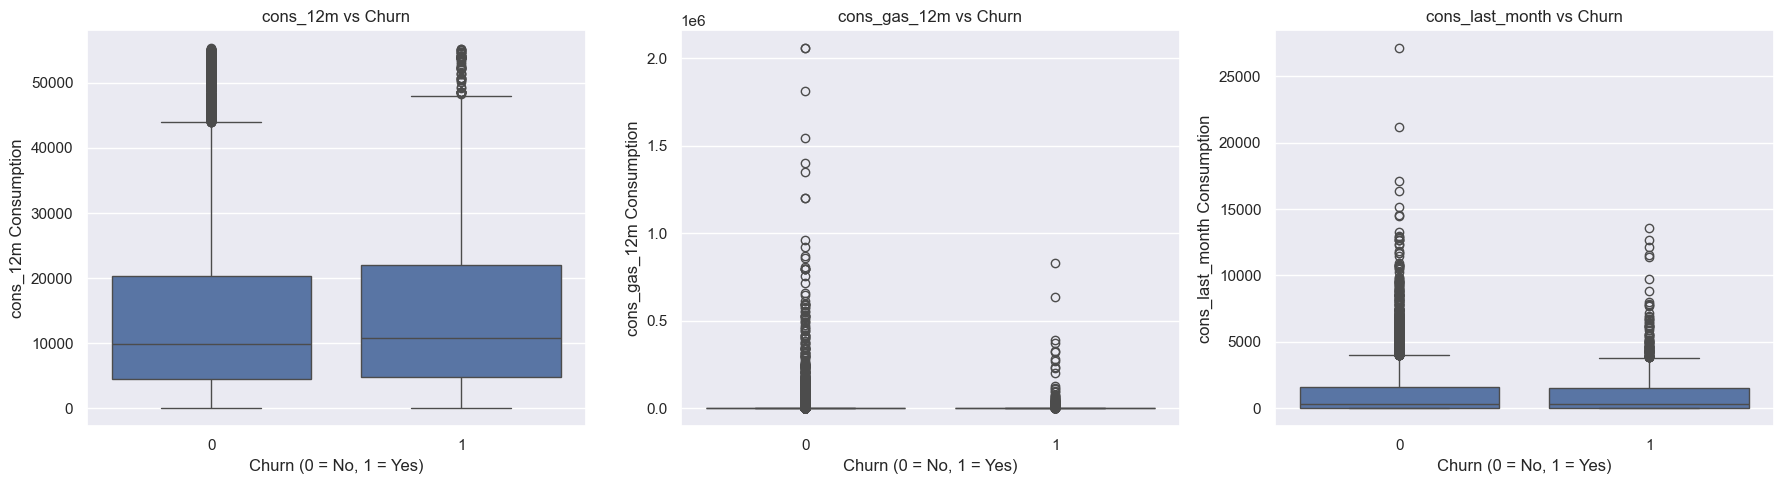

In [22]:
cons_columns = cons.columns.difference(['id', 'churn'])

plt.figure(figsize=(18, 5))

for i, col in enumerate(cons_columns, 1):  # Start from subplot index 1
    plt.subplot(1, 3, i)
    sns.boxplot(x='churn', y=col, data=cons)
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(f'{col} Consumption')

plt.tight_layout()
plt.show()

 ##### The consumption columns were having too many outliers(highly right skewed), so we tried after dropping the top values from (cons_12m column) and plotted the box plots with churned and retained distinction. Before plotting we are hoping to get some rough consumption range for the churn, but after plotting we can see in the above cell (especially in cons_12m column) that there is no significant difference between the churned and retained consumers. For further proof, we will do a statistical test. Moreover, if we consider these columns in the final prediction model, by droping the outlier clients, there won't be enough data left as we can see the above cells ,the number of rows we need to drop(around ~22%)

In [23]:
from scipy.stats import ttest_ind

for col in ['cons_12m', 'cons_gas_12m', 'cons_last_month']:
    churned = cons[cons['churn'] == 1][col]
    retained = cons[cons['churn'] == 0][col]
    t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
    print(f"{col} → p-value: {p_val:.4f}")


cons_12m → p-value: 0.0003
cons_gas_12m → p-value: 0.0243
cons_last_month → p-value: 0.8016


The above test show that the first two columns are statistically significant (but may still be weak practically) as the p-value is less than 0.05. So, in the final verdict, we won't be considering these columns(consumption columns) as selected features in the our prediction model.


---
### Date Columns

In [24]:
dates = client[['date_activ','date_end', 'date_modif_prod','date_renewal', 'num_years_antig', 'churn']]
dates_churned = dates[dates['churn'] == 1]
dates_retained = dates[dates['churn'] == 0]

In [25]:
# Making a function to extract year and month of any date column
def extract_year_month(df, col):
    df_1 = pd.DataFrame()
    df_1['year'] = df[col].dt.year
    df_1['mth'] = df[col].dt.month
    return df_1

Years and Months when the customers started to join.

      Year  Year %
year              
2003    39    0.27
2004   137    0.94
2005   189    1.29
2006    36    0.25
2007    95    0.65
2008   124    0.85
2009  2690   18.42
2010  3609   24.71
2011  2758   18.88
2012  3704   25.36
2013  1224    8.38
2014     1    0.01


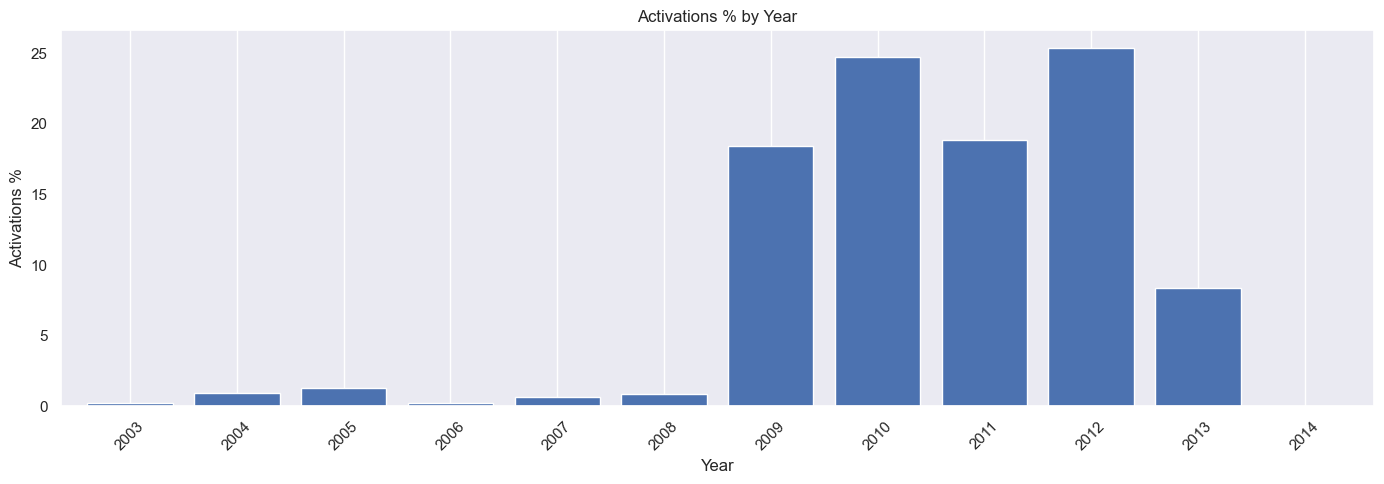

     Month  Month %
mth                
1     1332     9.12
2     1317     9.02
3     1073     7.35
4      982     6.72
5     1092     7.48
6     1437     9.84
7     1151     7.88
8     1238     8.48
9     1099     7.52
10    1284     8.79
11    1300     8.90
12    1301     8.91


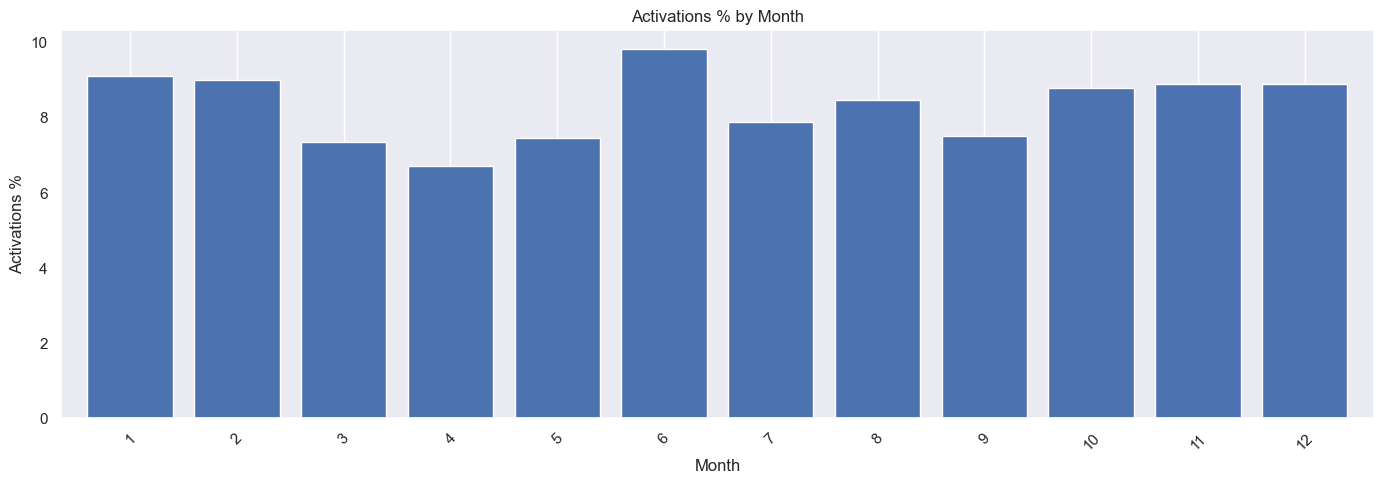

In [26]:
# Activation
print('Years and Months when the customers started to join.\n')
activation = extract_year_month(dates,'date_activ')
activations_by_year = activation['year'].value_counts().sort_index()
activations_by_month = activation['mth'].value_counts().sort_index()

activation_by_year_pct = (activations_by_year/len(dates))*100
activation_by_month_pct = (activations_by_month/len(dates))*100

print(pd.DataFrame({
    'Year': activations_by_year,
    'Year %': activation_by_year_pct.round(2),
}))

plt.figure(figsize=(14, 5))
activation_by_year_pct.sort_index().plot(kind='bar', width=0.8)
plt.title('Activations % by Year')
plt.ylabel('Activations %')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

print(pd.DataFrame({
    'Month': activations_by_month,
    'Month %' : activation_by_month_pct.round(2)
}))
plt.figure(figsize=(14, 5))
activation_by_month_pct.sort_index().plot(kind='bar', width=0.8)
plt.title('Activations % by Month')
plt.ylabel('Activations %')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

##### From above, we can see that most of the new customers joined in the years between (2009-13), where as there are no records of new customers after 2013. 2014 had just 1 new customer in the whole year, so we need to focus what exactly happened in 2014 and afterwards. Also, from month wise analysis, we can see most new customers joined in the start of the year(months 1 and 2) or in the 6th month(may be due to new financial year).

Years and Months when the customers started to End their subscriptions.

       Year  Year %
year               
2016  13663   93.54
2017    943    6.46
     Month  Month %
mth                
1     1046     7.16
2     1391     9.52
3     1260     8.63
4      993     6.80
5     1093     7.48
6     1350     9.24
7     1110     7.60
8     1140     7.81
9     1137     7.78
10    1385     9.48
11    1374     9.41
12    1327     9.09
-----------------------------Only Churned Customers --------------------------------------
      Year  Year %
year              
2016  1318   92.88
2017   101    7.12
     Month  Month %
mth                
1      112     7.89
2      149    10.50
3      124     8.74
4       94     6.62
5      108     7.61
6      143    10.08
7       89     6.27
8      111     7.82
9       98     6.91
10     139     9.80
11     143    10.08
12     109     7.68


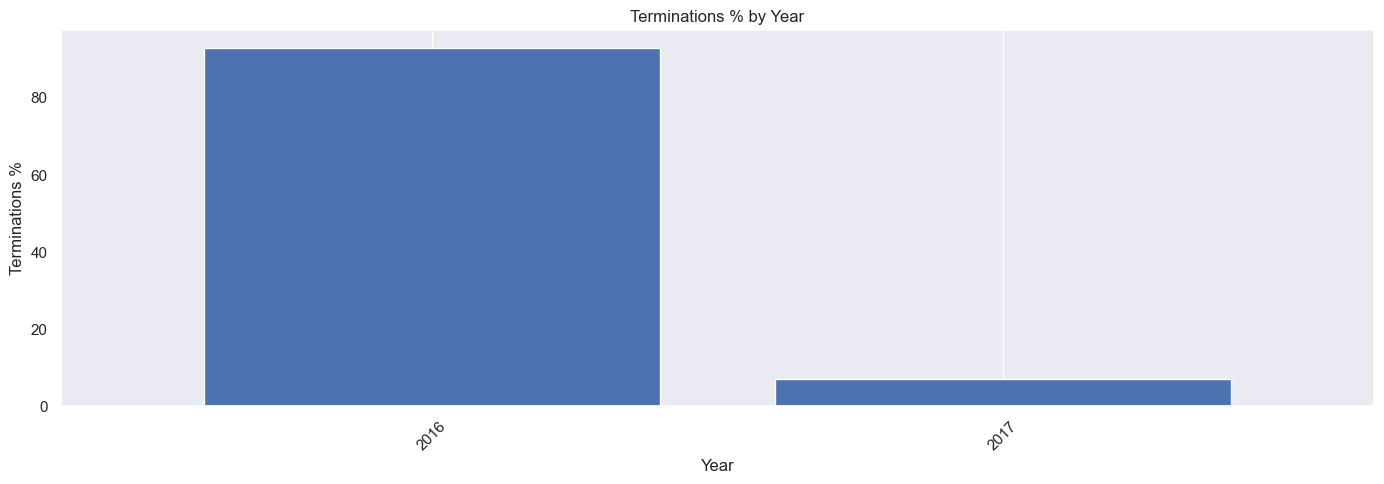

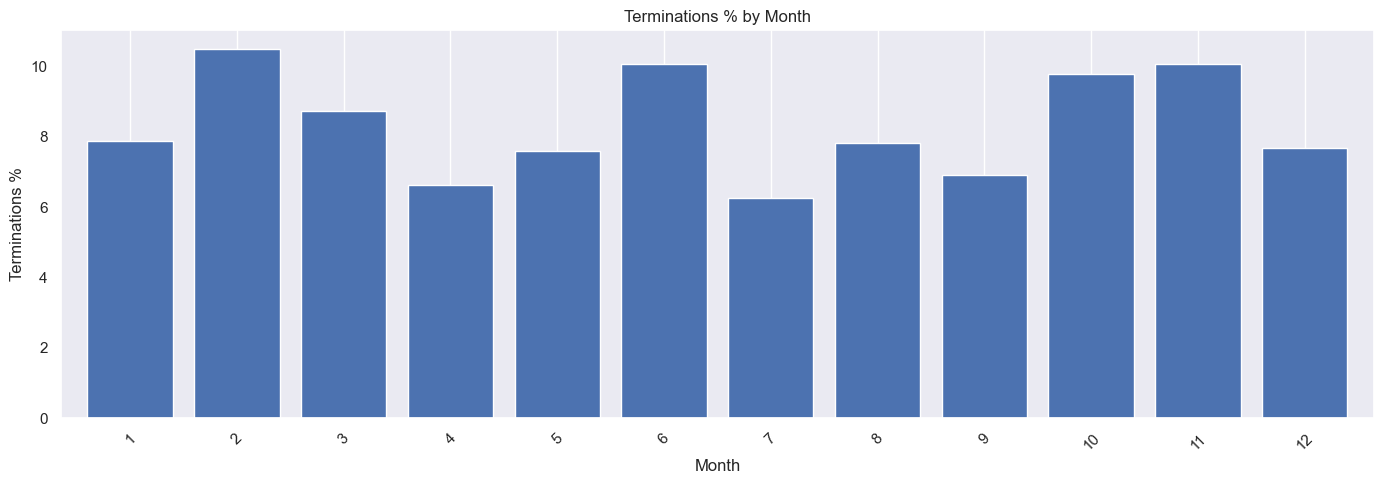

In [27]:
# Terminations
print('Years and Months when the customers started to End their subscriptions.\n')

termination = extract_year_month(dates,'date_end')
terminations_by_year = termination['year'].value_counts().sort_index()
terminations_by_month = termination['mth'].value_counts().sort_index()

termination_by_year_pct = (terminations_by_year/len(dates))*100
termination_by_month_pct = (terminations_by_month/len(dates))*100

print(pd.DataFrame({
    'Year': terminations_by_year,
    'Year %': termination_by_year_pct.round(2),
}))
print(pd.DataFrame({
    'Month': terminations_by_month,
    'Month %' : termination_by_month_pct.round(2)
}))

print('-----------------------------Only Churned Customers --------------------------------------')
termination = extract_year_month(dates_churned,'date_end')
terminations_by_year = termination['year'].value_counts().sort_index()
terminations_by_month = termination['mth'].value_counts().sort_index()

termination_by_year_pct = (terminations_by_year/len(dates_churned))*100
termination_by_month_pct = (terminations_by_month/len(dates_churned))*100

print(pd.DataFrame({
    'Year': terminations_by_year,
    'Year %': termination_by_year_pct.round(2),
}))
print(pd.DataFrame({
    'Month': terminations_by_month,
    'Month %' : termination_by_month_pct.round(2)
}))
plt.figure(figsize=(14, 5))
termination_by_year_pct.sort_index().plot(kind='bar', width=0.8)
plt.title('Terminations % by Year')
plt.ylabel('Terminations %')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(14, 5))
termination_by_month_pct.sort_index().plot(kind='bar', width=0.8)
plt.title('Terminations % by Month')
plt.ylabel('Terminations %')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

From above, we can see that almost 93% of the customers had contract end year in the year 2016 and we can also see around 90%(out of the total churned), left the company in 2016 too. So, we can say that the churn happned near the contract end date. Also, the churn is evident in the months like 2nd, 6th and 11th, monthwise.

In [28]:
# Modifications and Renewals
print('Years and Months when the customers modified the product or renewed their subscriptions.\n')
print('-----------------------------------------------------------------MODIFICATIONS--------------------------------------------------------------------------')
modification = extract_year_month(dates,'date_modif_prod')
modifications_by_year = modification['year'].value_counts().sort_index()
modifications_by_month = modification['mth'].value_counts().sort_index()

modification_by_year_pct = (modifications_by_year/len(dates))*100
modification_by_month_pct = (modifications_by_month/len(dates))*100

print(pd.DataFrame({
    'Year': modifications_by_year,
    'Year %': modification_by_year_pct.round(2),
}))
print(pd.DataFrame({
    'Month': modifications_by_month,
    'Month %' : modification_by_month_pct.round(2)
}))

print('-----------------------------Only Churned Customers --------------------------------------')
modification = extract_year_month(dates_churned,'date_modif_prod')
modifications_by_year = modification['year'].value_counts().sort_index()
modifications_by_month = modification['mth'].value_counts().sort_index()

modification_by_year_pct = (modifications_by_year/len(dates_churned))*100
modification_by_month_pct = (modifications_by_month/len(dates_churned))*100

print(pd.DataFrame({
    'Year': modifications_by_year,
    'Year %': modification_by_year_pct.round(2),
}))
print(pd.DataFrame({
    'Month': modifications_by_month,
    'Month %' : modification_by_month_pct.round(2)
}))

print('-----------------------------------------------------------------RENEWALS--------------------------------------------------------------------------')
renewal = extract_year_month(dates,'date_renewal')
renewals_by_year = renewal['year'].value_counts().sort_index()
renewals_by_month = renewal['mth'].value_counts().sort_index()

renewal_by_year_pct = (renewals_by_year/len(dates))*100
renewal_by_month_pct = (renewals_by_month/len(dates))*100

print(pd.DataFrame({
    'Year': renewals_by_year,
    'Year %': renewal_by_year_pct.round(2),
}))
print(pd.DataFrame({
    'Month': renewals_by_month,
    'Month %' : renewal_by_month_pct.round(2)
}))

print('-----------------------------Only Churned Customers --------------------------------------')
renewal = extract_year_month(dates_churned,'date_renewal')
renewals_by_year = renewal['year'].value_counts().sort_index()
renewals_by_month = renewal['mth'].value_counts().sort_index()

renewal_by_year_pct = (renewals_by_year/len(dates_churned))*100
renewal_by_month_pct = (renewals_by_month/len(dates_churned))*100

print(pd.DataFrame({
    'Year': renewals_by_year,
    'Year %': renewal_by_year_pct.round(2),
}))
print(pd.DataFrame({
    'Month': renewals_by_month,
    'Month %' : renewal_by_month_pct.round(2)
}))

Years and Months when the customers modified the product or renewed their subscriptions.

-----------------------------------------------------------------MODIFICATIONS--------------------------------------------------------------------------
      Year  Year %
year              
2003    22    0.15
2004    70    0.48
2005   104    0.71
2006    26    0.18
2007    78    0.53
2008    78    0.53
2009  1499   10.26
2010  2248   15.39
2011  1296    8.87
2012  1385    9.48
2013  1243    8.51
2014  1516   10.38
2015  4974   34.05
2016    67    0.46
     Month  Month %
mth                
1      821     5.62
2      830     5.68
3     1008     6.90
4     1140     7.81
5     1391     9.52
6     1467    10.04
7     1288     8.82
8     1027     7.03
9     1112     7.61
10    1343     9.19
11    2155    14.75
12    1024     7.01
-----------------------------Only Churned Customers --------------------------------------
      Year  Year %
year              
2003     1    0.07
2004     7    0.49
2005  

In [29]:
modification = extract_year_month(dates,'date_modif_prod')
modification[modification['year'] ==2015].value_counts().sort_values(ascending=False)

year  mth
2015  11     1203
      5       631
      12      566
      7       502
      9       454
      4       358
      6       344
      8       318
      10      273
      3       188
      2        74
      1        63
Name: count, dtype: int64

In [30]:
modification = extract_year_month(dates_churned,'date_modif_prod')
modification[modification['year'] ==2015].value_counts().sort_values(ascending=False)

year  mth
2015  11     128
      5       71
      4       59
      12      59
      9       52
      7       44
      8       33
      6       31
      10      27
      3       17
      2        8
      1        5
Name: count, dtype: int64

So, from above, we can see that most modifications in the existing product were made in 2015(with highest in the month of Nov), just before the churn started in 2016. We can confirm that from seperate churned data too. Also, from the renewl dates we can see that, just before the customer needed to renew thier contract services, they left the company. Most of the renewals(around 90%) were based in 2015 only.

---
### Forecast Columns

In [31]:
forecast = client[['date_activ','forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas','churn']]

forecast['year'] = forecast['date_activ'].dt.year
forecast['month'] = forecast['date_activ'].dt.month
forecast = forecast[['date_activ', 'year', 'month', 'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'churn']]


C:\Users\deads\AppData\Local\Temp\ipykernel_2996\3844724061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['year'] = forecast['date_activ'].dt.year
C:\Users\deads\AppData\Local\Temp\ipykernel_2996\3844724061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['month'] = forecast['date_activ'].dt.month


In [32]:
# Considering only 75% of the data(till Q3) and removing high value outliers
forecast_churned = forecast[(forecast['forecast_meter_rent_12m'] < 150) & (forecast['forecast_cons_12m'] < 3000) & (forecast['churn'] == 1)]
forecast_retained = forecast[(forecast['forecast_meter_rent_12m'] < 150) & (forecast['forecast_cons_12m'] < 3000) & (forecast['churn'] == 0)]

In [33]:
forecast_yearly = forecast.groupby('year')[forecast.columns[3:-2]].agg('mean')
forecast_yearly_churned = forecast_churned.groupby('year')[forecast_churned.columns[3:-2]].agg('mean')
forecast_yearly_retained = forecast_retained.groupby('year')[forecast_retained.columns[3:-2]].agg('mean')

--------------------------------------------------------START - forecast_cons_12m--------------------------------------------------------------------


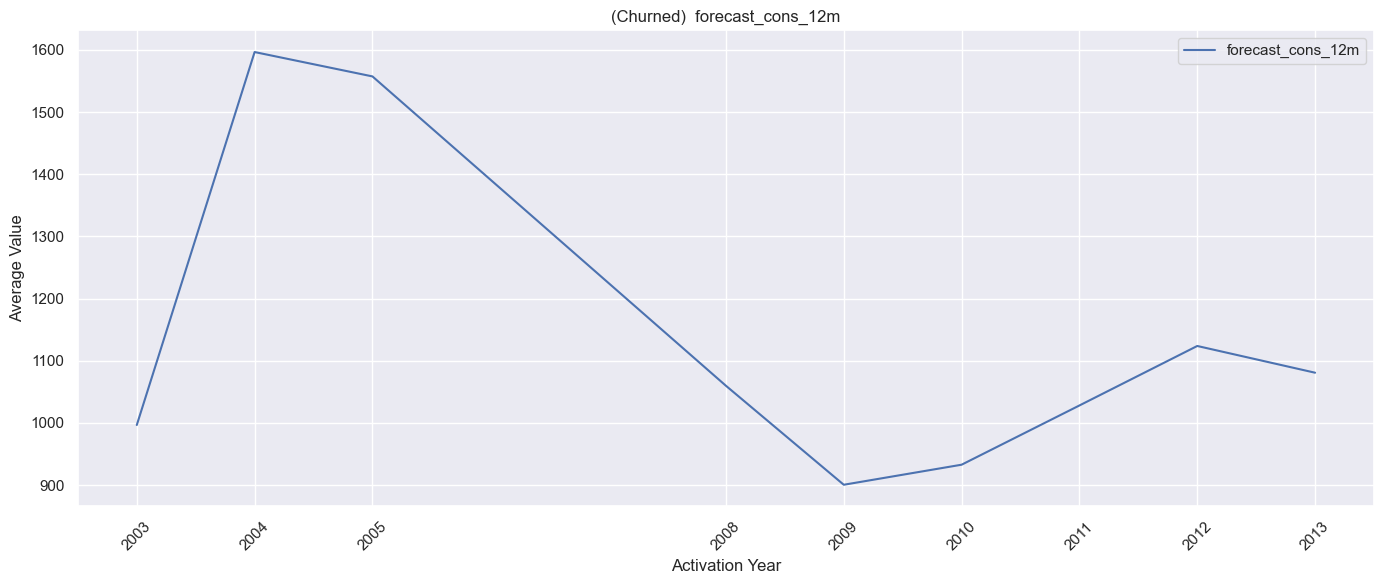

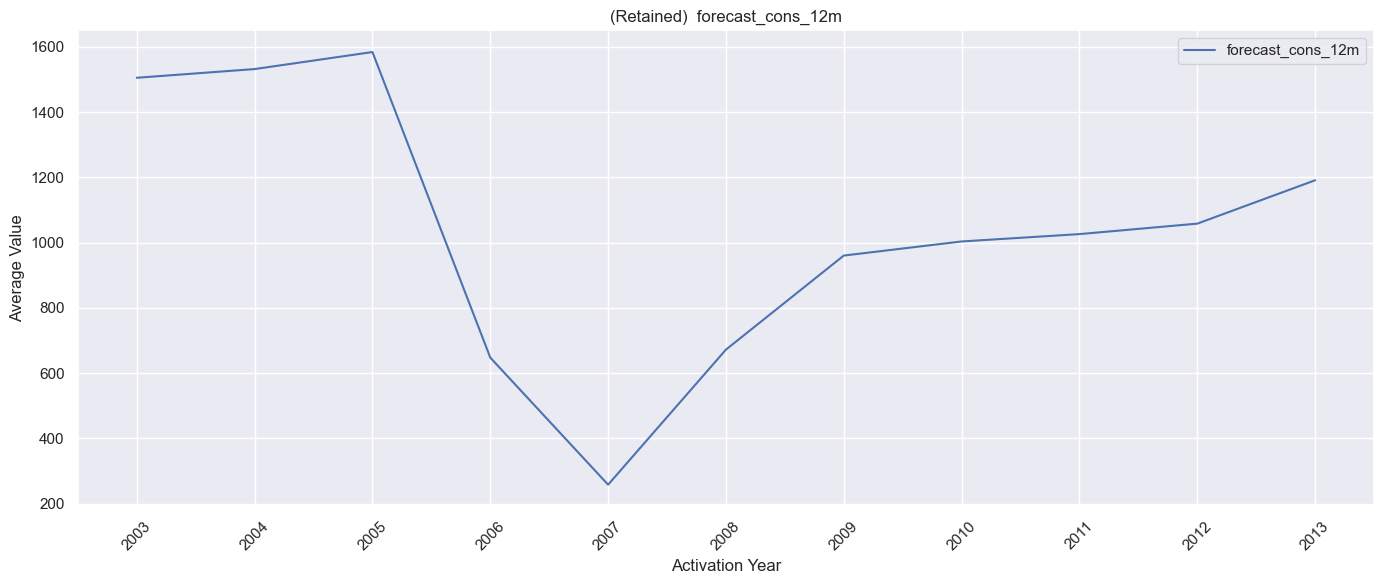

--------------------------------------------------------END--------------------------------------------------------------------
--------------------------------------------------------START - forecast_discount_energy--------------------------------------------------------------------


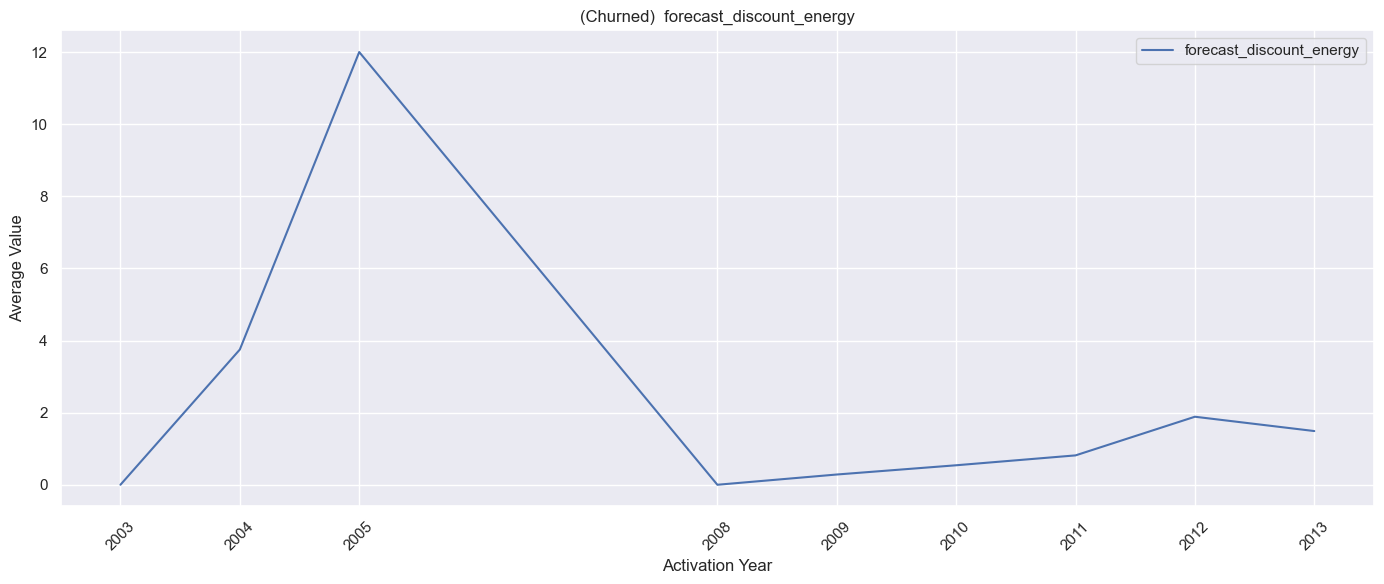

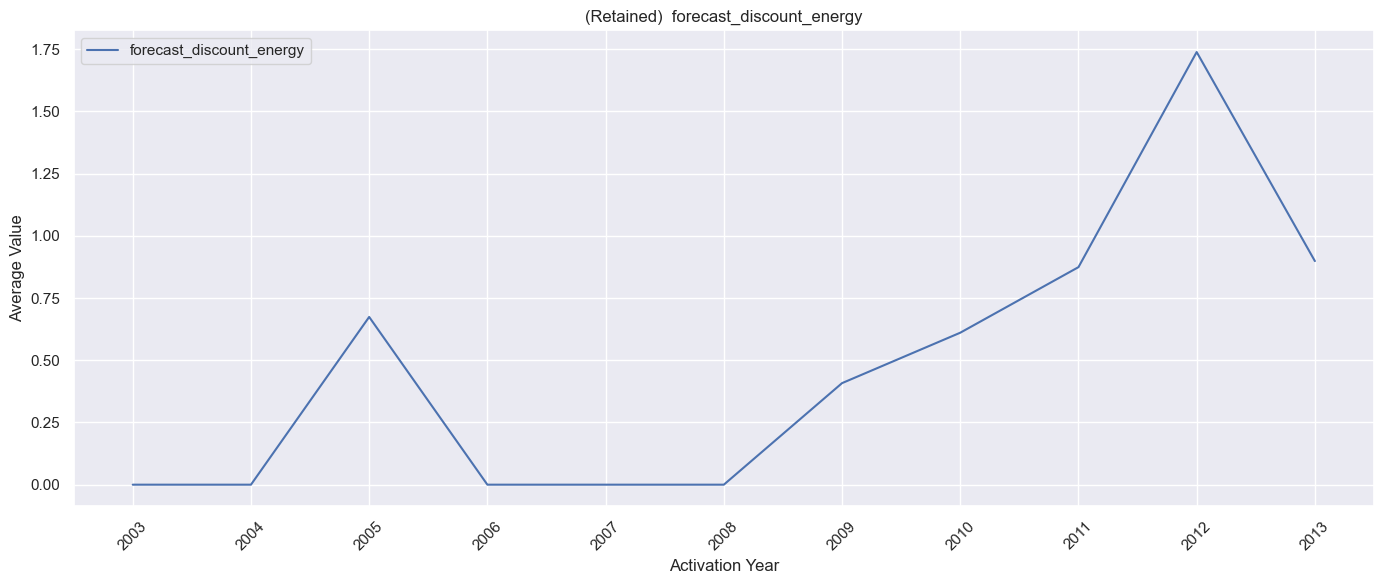

--------------------------------------------------------END--------------------------------------------------------------------
--------------------------------------------------------START - forecast_meter_rent_12m--------------------------------------------------------------------


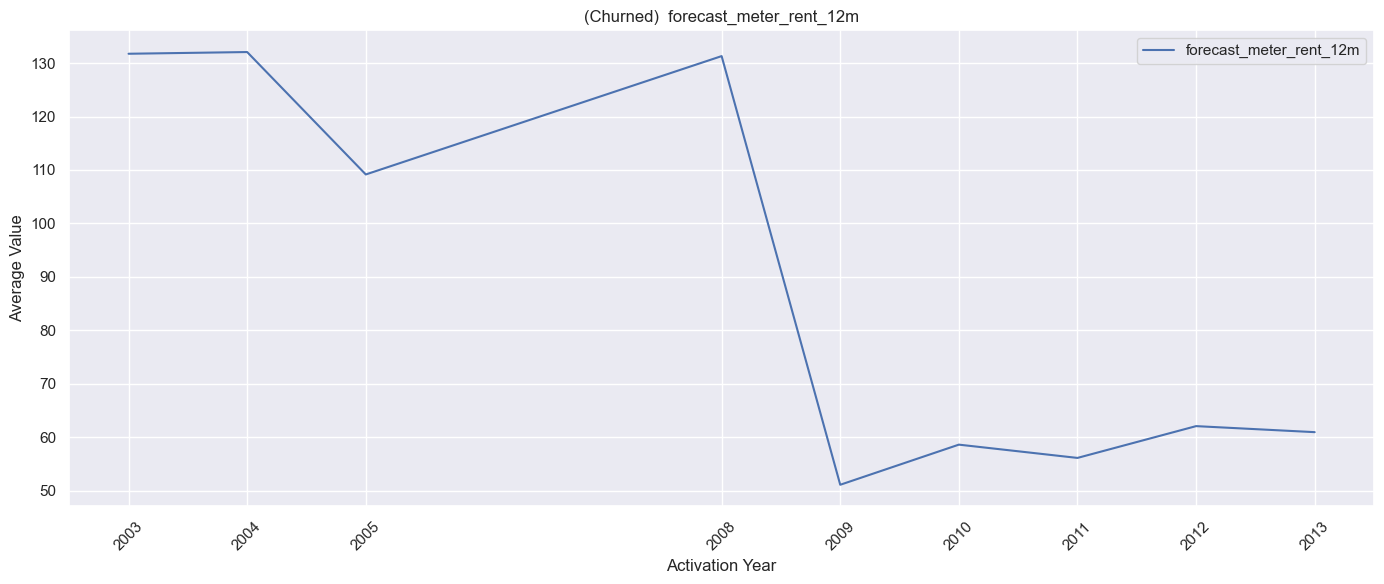

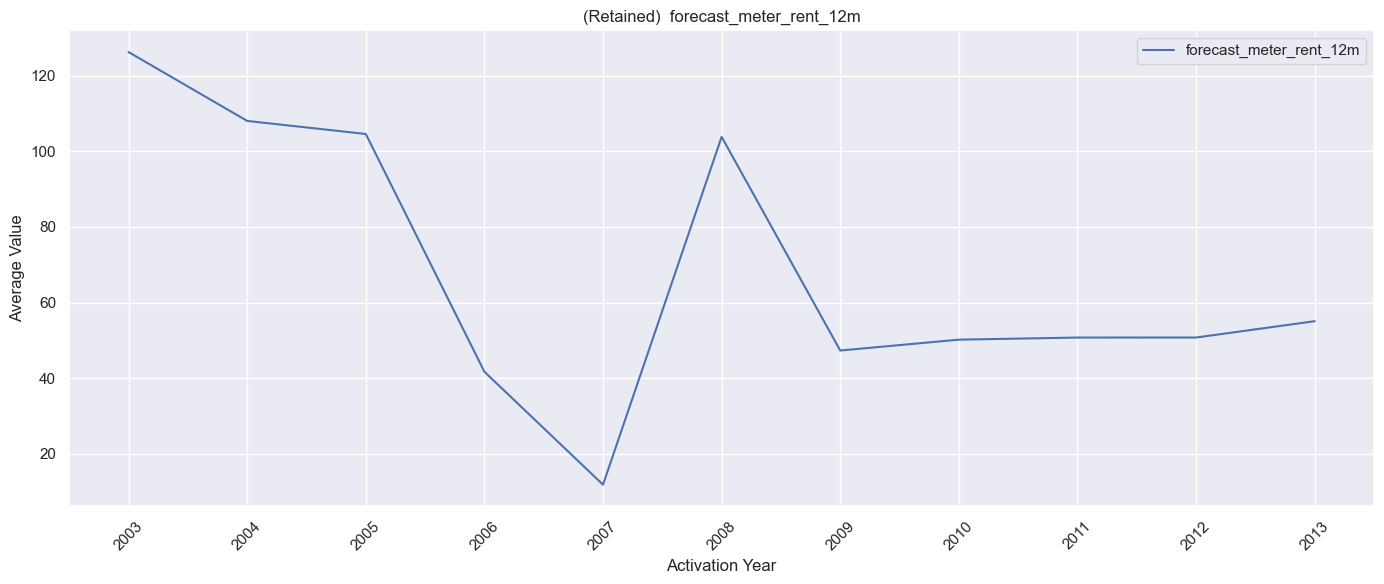

--------------------------------------------------------END--------------------------------------------------------------------
--------------------------------------------------------START - forecast_price_energy_off_peak--------------------------------------------------------------------


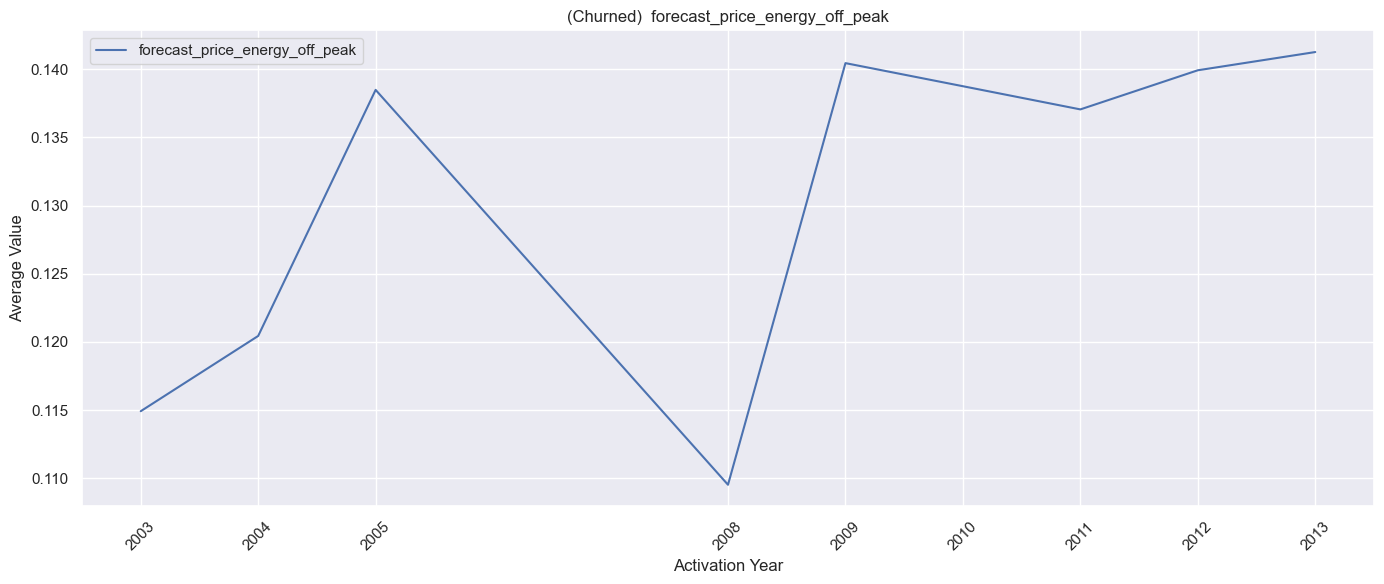

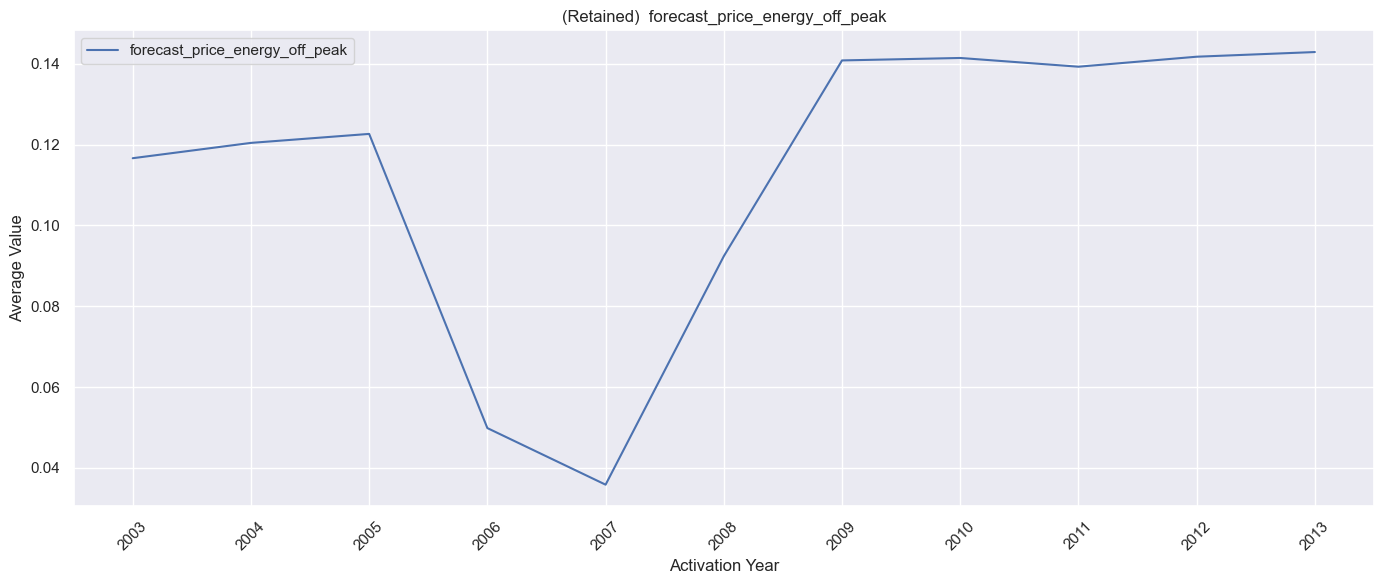

--------------------------------------------------------END--------------------------------------------------------------------
--------------------------------------------------------START - forecast_price_energy_peak--------------------------------------------------------------------


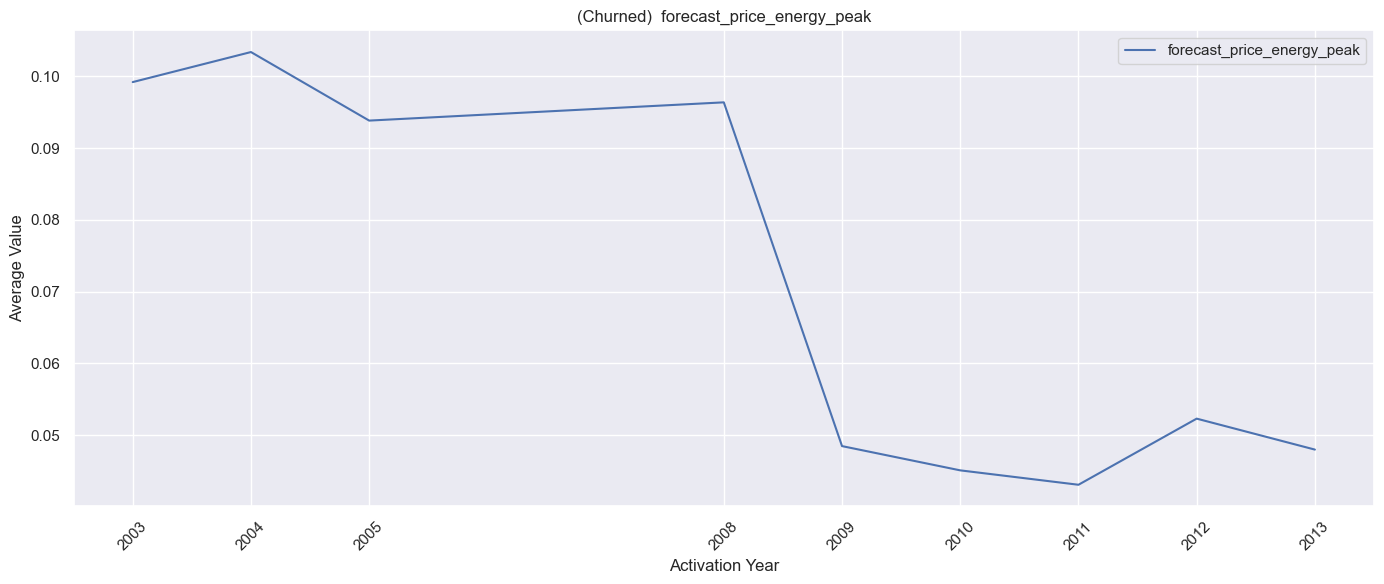

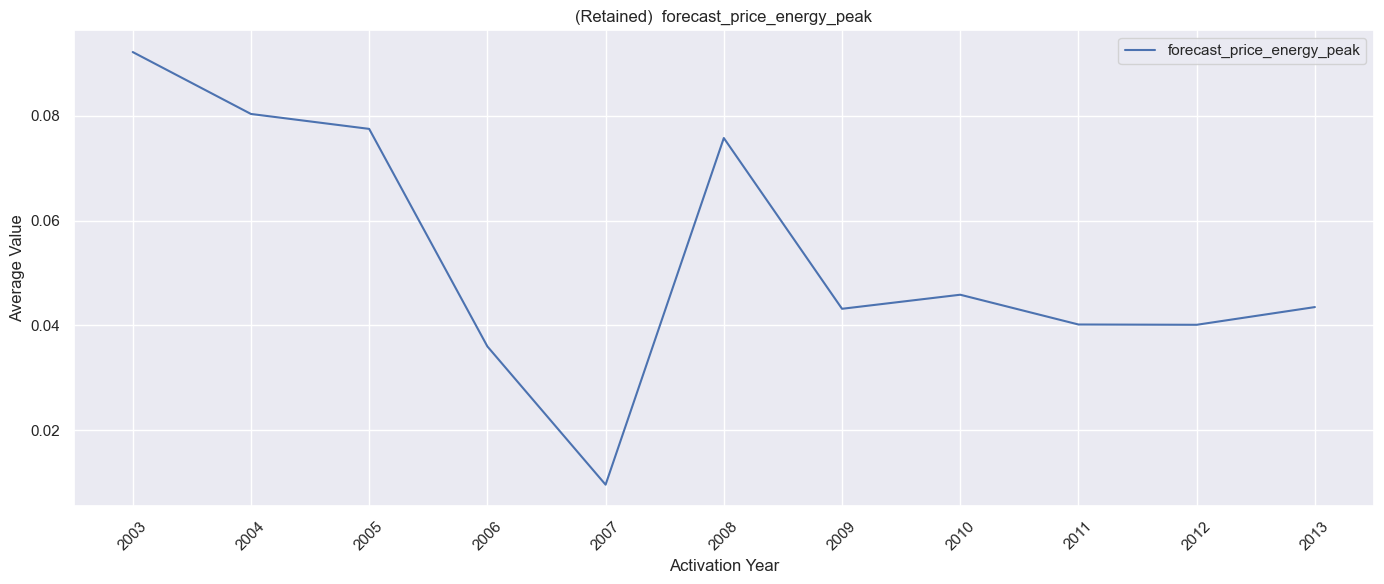

--------------------------------------------------------END--------------------------------------------------------------------
--------------------------------------------------------START - forecast_price_pow_off_peak--------------------------------------------------------------------


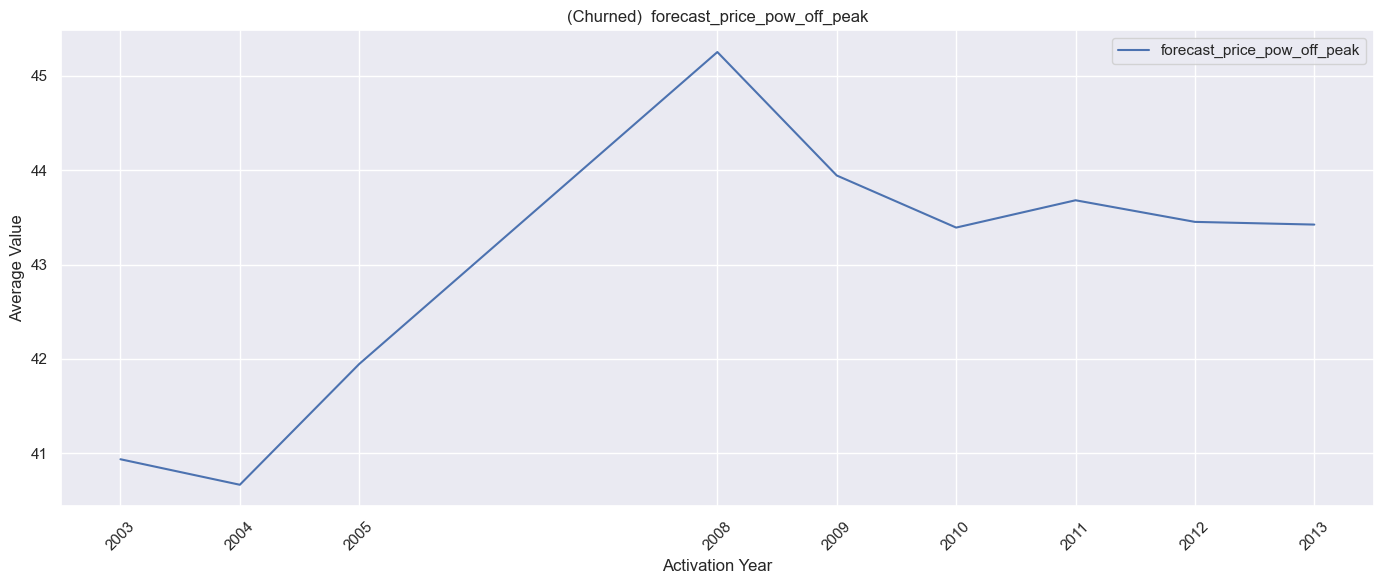

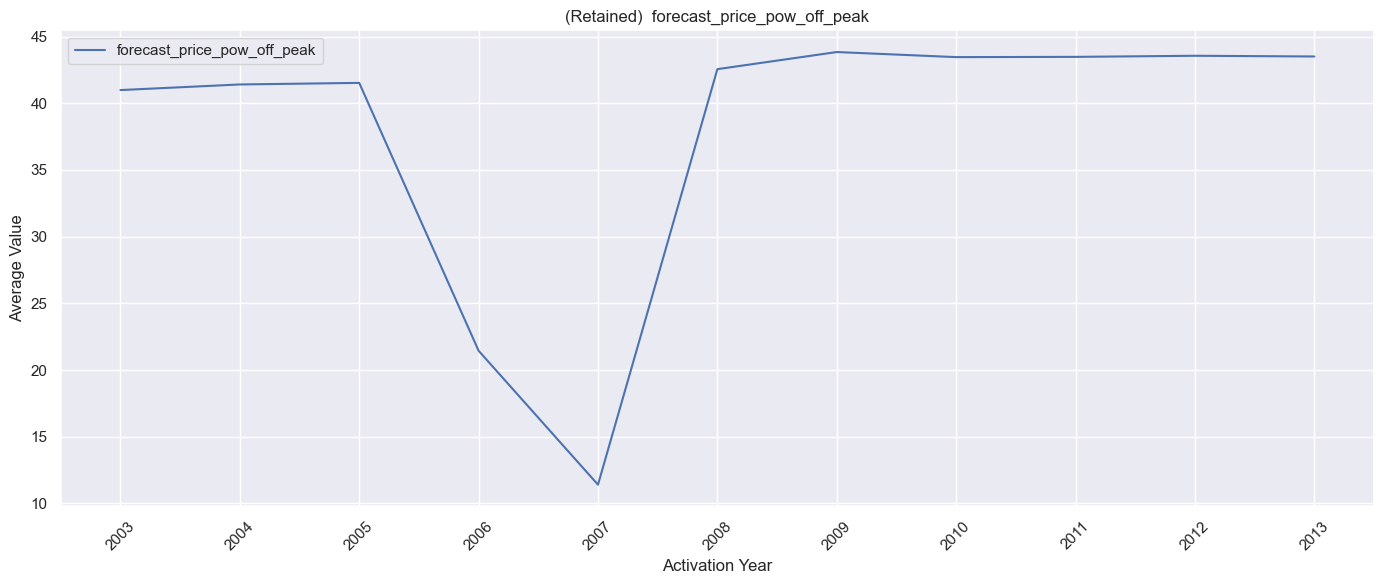

--------------------------------------------------------END--------------------------------------------------------------------


In [34]:
for col in forecast_yearly.columns:
    print(f'--------------------------------------------------------START - {col}--------------------------------------------------------------------')
    plt.figure(figsize=(14, 6))
    plt.plot(forecast_yearly_churned.index, forecast_yearly_churned[col], label=col)
    
    plt.title(f'(Churned)  {col}')
    plt.xlabel('Activation Year')
    plt.ylabel('Average Value')
    plt.xticks(ticks = forecast_yearly_churned.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(14, 6))
    
    plt.plot(forecast_yearly_retained.index, forecast_yearly_retained[col], label=col)
    
    plt.title(f'(Retained)  {col}')
    plt.xlabel('Activation Year')
    plt.ylabel('Average Value')
    plt.xticks(ticks = forecast_yearly_retained.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    print(f'--------------------------------------------------------END--------------------------------------------------------------------')

From the forecast graphs (12m_consumption), we can observe that after a dip in 2007(for retainded) and 2009(for churned) customers, forcasted consumption is increasing overall for the retained customers, while decreasing for the churned. So, we can consider this column for prediction models.

From discounts, we can see that the churned customers were provided with very high amount of discounts in the initial years, which in the later years was reduced and it kept reducing. This may be one of the factors why they decided to leave the company as on the other side when we observe, the retained customers were not given that much discounts on the energy prices so even when the company reduced the discounts, they were not bothered by the decision. 

From the meter_rents, we can see that initially the meter rent was charged more for churned customers, which over the years reduced nearly by 50% but was still more than the retained ones.

Energy and Power Prices didn't show any significant differences between the two types of customers.

Overall, we can see the churned customers were the ones who were given less discounts(in the last years) and more charged on the meter rents compared to the retained customers.

### Has Gas Column

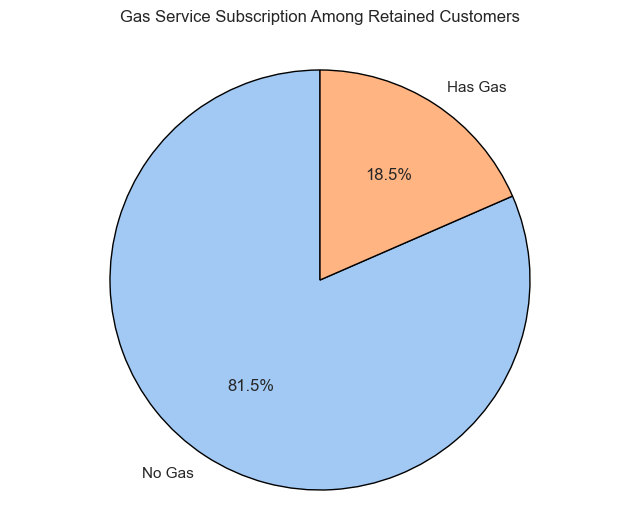

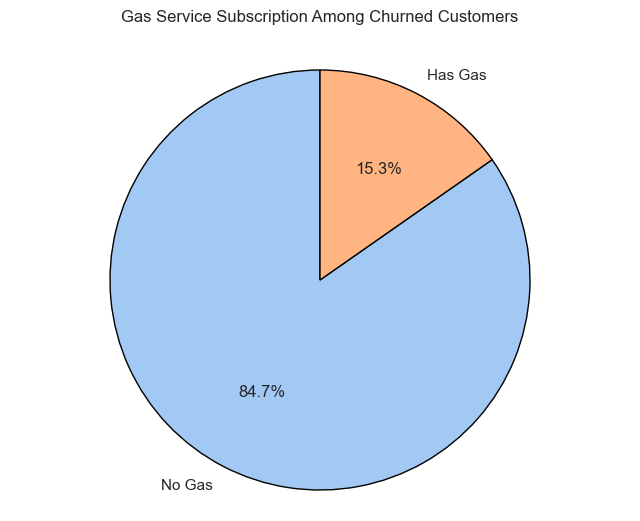

In [35]:
def create_gas_pie_chart(df, churn_status, title_suffix):
    
    # Calculating the percentages
    gas_data = (df[df['churn'] == churn_status]['has_gas'].value_counts() / 
                df[df['churn'] == churn_status].shape[0]) * 100
    
    # Converting to DataFrame
    data = gas_data.reset_index()
    data.columns = ['has_gas', 'percentage']
    
    # Creating pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(
        data['percentage'],
        labels=data['has_gas'].map({'t': 'Has Gas', 'f': 'No Gas'}),
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    plt.axis('equal')
    plt.title(f'Gas Service Subscription Among {title_suffix} Customers', pad=20)
    plt.show()

# Generating both charts
create_gas_pie_chart(client, 0, "Retained")
create_gas_pie_chart(client, 1, "Churned")

From above we can see that there is no significant trend among the types of customers. So, we cannot say the one who has both the services, will not tend to leave the company or continue.

### Margin Columns

In [36]:
# Plotting the line graphs for the price df so w.r.t date column so that we can see when was the price increased
price['price_date'] = pd.to_datetime(price['price_date'], format='%Y-%m-%d', errors='coerce')


In [37]:
margin = client[['date_activ','nb_prod_act', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn']]
margin['year'] = margin['date_activ'].dt.year

margin = margin[['date_activ', 'year','nb_prod_act', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn']]

C:\Users\deads\AppData\Local\Temp\ipykernel_2996\274858441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  margin['year'] = margin['date_activ'].dt.year


In [38]:
margin_churned = margin[margin['churn'] == 1]
margin_retained = margin[margin['churn'] == 0]

In [39]:
margin_churned['nb_prod_act'].value_counts()/margin_churned.shape[0]

nb_prod_act
1    0.804087
2    0.146582
3    0.036646
4    0.010571
5    0.002114
Name: count, dtype: float64

In [40]:
margin_retained['nb_prod_act'].value_counts()/margin_retained.shape[0]

nb_prod_act
1     0.780314
2     0.169637
3     0.035717
4     0.010237
5     0.002123
9     0.000834
6     0.000607
8     0.000303
10    0.000152
32    0.000076
Name: count, dtype: float64

C:\Users\deads\AppData\Local\Temp\ipykernel_2996\1732106928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churned_years.index, y=churned_years.values, ax=ax1, palette='Reds_r')
C:\Users\deads\AppData\Local\Temp\ipykernel_2996\1732106928.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retained_years.index, y=retained_years.values, ax=ax2, palette='Blues_r')


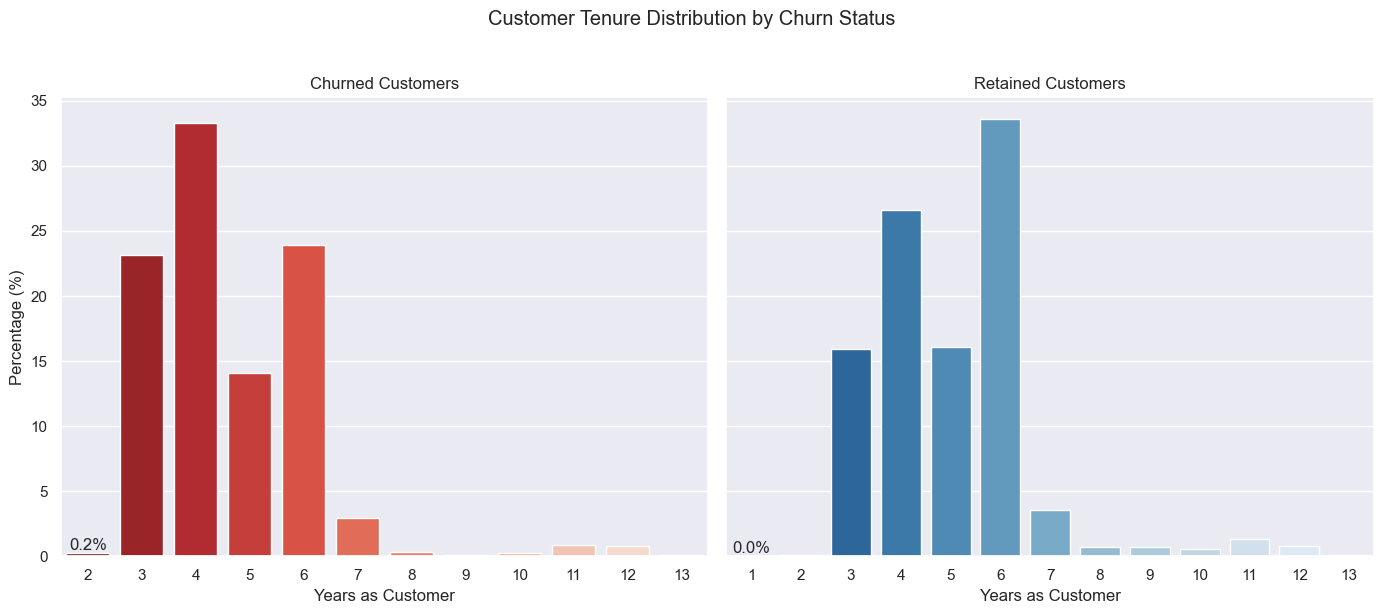

In [41]:
# Calculating percentages
churned_years = (margin_churned['num_years_antig'].value_counts() / margin_churned.shape[0]) * 100
retained_years = (margin_retained['num_years_antig'].value_counts() / margin_retained.shape[0]) * 100

# Creating figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Churned 
sns.barplot(x=churned_years.index, y=churned_years.values, ax=ax1, palette='Reds_r')
ax1.set_title('Churned Customers')
ax1.set_xlabel('Years as Customer')
ax1.set_ylabel('Percentage (%)')
ax1.bar_label(ax1.containers[0], fmt='%.1f%%')  

# Retained 
sns.barplot(x=retained_years.index, y=retained_years.values, ax=ax2, palette='Blues_r')
ax2.set_title('Retained Customers')
ax2.set_xlabel('Years as Customer')
ax2.set_ylabel('')
ax2.bar_label(ax2.containers[0], fmt='%.1f%%')  


plt.suptitle('Customer Tenure Distribution by Churn Status', y=1.02)
plt.tight_layout()
plt.show()

From above, we can see that customers who joined the company in the year 2010 to 2013 are the ones that left the company in 2016.

In [42]:
origin = margin[['year','origin_up','churn']]

In [43]:
origin_1 = pd.crosstab(index=origin['churn'], columns=origin['origin_up'],margins=True)
origin_1

origin_up,MISSING,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp,All
churn,,,,,,,
0,60,1,4036,2884,6204,2,13187
1,4,0,258,264,893,0,1419
All,64,1,4294,3148,7097,2,14606


In [44]:
margin_1 = margin[margin['margin_gross_pow_ele'] - margin['margin_net_pow_ele'] ==0]

In [45]:
margin_1.drop(columns = ['margin_gross_pow_ele'], inplace=True)

C:\Users\deads\AppData\Local\Temp\ipykernel_2996\2048761494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  margin_1.drop(columns = ['margin_gross_pow_ele'], inplace=True)


In [46]:
margin_1.groupby(by='churn')[['net_margin','pow_max']].describe()

net_margin                                                        \
           count        mean         std  min     25%     50%      75%   
churn                                                                    
0        13185.0  184.836983  230.774411  0.0  50.500  111.86  239.830   
1         1419.0  228.361938  705.675542  0.0  52.605  121.86  271.935   

                 pow_max                                                  \
            max    count       mean        std  min    25%     50%   75%   
churn                                                                      
0      10203.50  13185.0  18.000596  13.155202  3.3  12.50  13.856  19.0   
1      24570.65   1419.0  19.387827  16.613367  6.0  13.15  13.856  19.8   

              
         max  
churn         
0      260.0  
1      320.0

## Price Analysis

In [47]:
price.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


In [48]:
price['price_date'] = pd.to_datetime(price['price_date'], format='%Y-%m-%d', errors='coerce')

In [49]:
price['month'] = price['price_date'].dt.month

price = price[['id', 'price_date', 'month', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']]

In [50]:
# Mapping the churn status
churn_dict = dict(zip(client['id'],client['churn']))
price['churn'] = price['id'].map(churn_dict)

In [51]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   month               193002 non-null  int32         
 3   price_off_peak_var  193002 non-null  float64       
 4   price_peak_var      193002 non-null  float64       
 5   price_mid_peak_var  193002 non-null  float64       
 6   price_off_peak_fix  193002 non-null  float64       
 7   price_peak_fix      193002 non-null  float64       
 8   price_mid_peak_fix  193002 non-null  float64       
 9   churn               175149 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory usage: 14.0+ MB


In [52]:
price['churn'].isna().sum()

np.int64(17853)

In [53]:
price.dropna(inplace=True)

In [54]:
price.shape

(175149, 10)

In [55]:
price_churned = price[price['churn'] == 1].reset_index()
price_retained = price[price['churn'] == 0].reset_index()

print(price_churned.shape, price_retained.shape)

(17003, 11) (158146, 11)


In [57]:
price_churned.columns

Index(['index', 'id', 'price_date', 'month', 'price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix', 'churn'],
      dtype='object')

In [58]:
price_churned.describe()

,index,price_date,month,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
count,17003.000000,17003,17003.000000,17003.000000,17003.000000,17003.000000,17003.000000,17003.000000,17003.000000,17003.0
mean,93365.334706,2015-06-16 12:29:56.294771456,6.500676,0.141898,0.056554,0.033343,43.163536,11.192617,7.156747,1.0
min,60.000000,2015-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,43972.500000,2015-03-16 12:00:00,3.500000,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,1.0
50%,96759.000000,2015-07-01 00:00:00,7.000000,0.145101,0.086905,0.000000,44.266930,0.000000,0.000000,1.0
75%,139264.500000,2015-10-01 00:00:00,10.000000,0.151367,0.103395,0.073487,44.266931,24.339581,16.226389,1.0
max,192821.000000,2015-12-01 00:00:00,12.000000,0.280700,0.169597,0.101037,59.444710,36.490689,16.958222,1.0
std,55260.166013,NaN,3.452730,0.022393,0.050830,0.037065,3.339677,12.505705,8.001130,0.0


In [59]:
grouped_churned = price_churned.groupby(by=['month'])[['price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix']].mean()

grouped_retained = price_retained.groupby(by=['month'])[['price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix']].mean()

grouped_difference = grouped_churned-grouped_retained

grouped_difference

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
month,,,,,,
1,-0.000587,0.005179,0.005679,0.255481,1.954747,1.190813
2,-0.000543,0.005015,0.005671,0.239470,1.940632,1.188853
3,-0.000665,0.005300,0.005828,0.249785,2.001652,1.215182
4,-0.000362,0.005135,0.005637,0.237390,1.937826,1.181426
5,-0.000067,0.005204,0.005598,0.260690,1.917523,1.167352
6,0.000088,0.005003,0.005183,0.289366,1.768207,1.089397
7,-0.000125,0.004907,0.005612,0.277104,1.923258,1.182664
8,-0.000678,0.004855,0.005772,0.278428,1.982848,1.211243
9,-0.000472,0.004798,0.005630,0.327931,1.925269,1.171940


In [60]:
grouped_difference.mean()

price_off_peak_var   -0.000479
price_peak_var        0.004979
price_mid_peak_var    0.005618
price_off_peak_fix    0.259741
price_peak_fix        1.920038
price_mid_peak_fix    1.174295
dtype: float64

#### From the above analysis od the price dataset(of 2015), we can see that there is no significant difference between the price of energy and power paid by churned or retained customers over any period(peak, off-peak, mid-peak). The difference in energy price is in cents and the average difference between the power price(only in peak and mid-peak) is ~2 and 1 dollars.

---
### Conclusion:-

#### Based on the exploratory data analysis (EDA), the primary factors influencing customer churn at PowerCo appear to be dissatisfaction with certain sales channels, higher-than-average meter rental charges, and inconsistent promotional discounts, particularly cases where customers received generous energy discounts initially, followed by a steep drop. In contrast, variations in energy and power prices do not show a strong relationship with customer churn. These observations form the basis for initial hypotheses, which will require validation through machine learning models to assess feature importance and predictive value more accurately.

## 📌 Key Takeaways
- Churn ≈10%, but varies widely by channel and contract type.
- Consumption features differ significantly, though highly skewed → will transform.
- Early-tenure and single-product customers show higher churn → retention/cross-sell levers.
- 2016 saw a churn spike → possibly linked to market dynamics.
- Certain sales channels and marketing origins show systematically higher churn → strategic review needed.
